<a href="https://colab.research.google.com/github/tdushio/shiolabOpen/blob/master/33_LQE%E3%81%AB%E3%82%88%E3%82%8B%E3%82%AA%E3%83%96%E3%82%B6%E3%83%BC%E3%83%90%E3%81%AE%E8%A8%AD%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 33.LQEによるオブザーバの設計

## オブザーバ

オブザーバ(observer)とはシステムの状態空間表現を前提として、
直接測定可能な入出力信号から、
直接測定不可能な状態変数の現在値を推定する
状態推定器(state estimator)である。

状態変数の過去の値を推定する場合には（ノイズ）フィルタ、
未来の値を予測する場合には予測器などとも呼ばれる。

カルマンフィルタは確率的外乱を想定した場合の最適予測値を得るオブザーバである。
その際最適化問題を、線形システム(Linear system)の2次形式予測誤差(Quadratic)
を最小化する推定問題(estimation)として定式化するので LQE問題と呼ばれる。
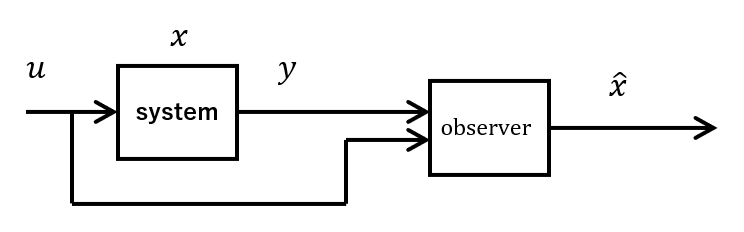




## 制御対象のモデル
倒立振子のモデルを
$1$ 入力$2$出力$4$次の線形時不変システム(LTI)で与える。<br>
\begin{equation}
   \dot{x}(t) = A x(t) + B u(t)+Gw(t) , \; x(0)=x_0 \\
    y(t) = C x(t)+Du(t)+v(t),\;\;   \nonumber
\end{equation}
ここで、状態$x(t)\in{\mathrm R}^4$は
$x=[z,\theta,\dot{z},\dot{\theta}]^\top$、
$u(t)\in{\mathrm R}$はモータへの入力である。
$x_0\in{\mathrm R}^4$は初期状態を表す。<br>
また、
$w$および$v$はLQE問題設定のための仮想的な外乱および雑音で
平均値 $0$で以下の分散行列に従う確率変数とする。<br>
$E\{ww^\top\}=Q_N$,$E\{vv^\top\}=R_N$,$E\{vw^\top\}=O$<br>
オブザーバ構成の前提として、$A,B,C,D$は既知とするが、
$G, Q_N, R_N$ は設計時のチューニングパラメータとして扱うこともできる。

## オブザーバの目的

入力$u(t)$を制御対象に印加したときの出力$y(t)$を用いて、
状態$x(t)$に漸近的に近づく$z(t)\to x(t)(t\to\infty)$を構成する。

## オブザーバ構成のアイデアと問題点：
オブザーバ構成の基本的アイデアは、対象とするシステムの数学モデルを用いて計算機でシミュレーションすることにより内部変数の振る舞いを推定することである。
今日的には、デジタルツインやエミュレータなどアイデアと同等である。<br>
ここで問題となるのは、はたして推定誤差は収束するのか？ということであるが、
これを測定可能な出力変数の予測誤差をフィードバックするという「出力注入」というアイデアで解決する。
この考え方を図解で示したのが下の図である。


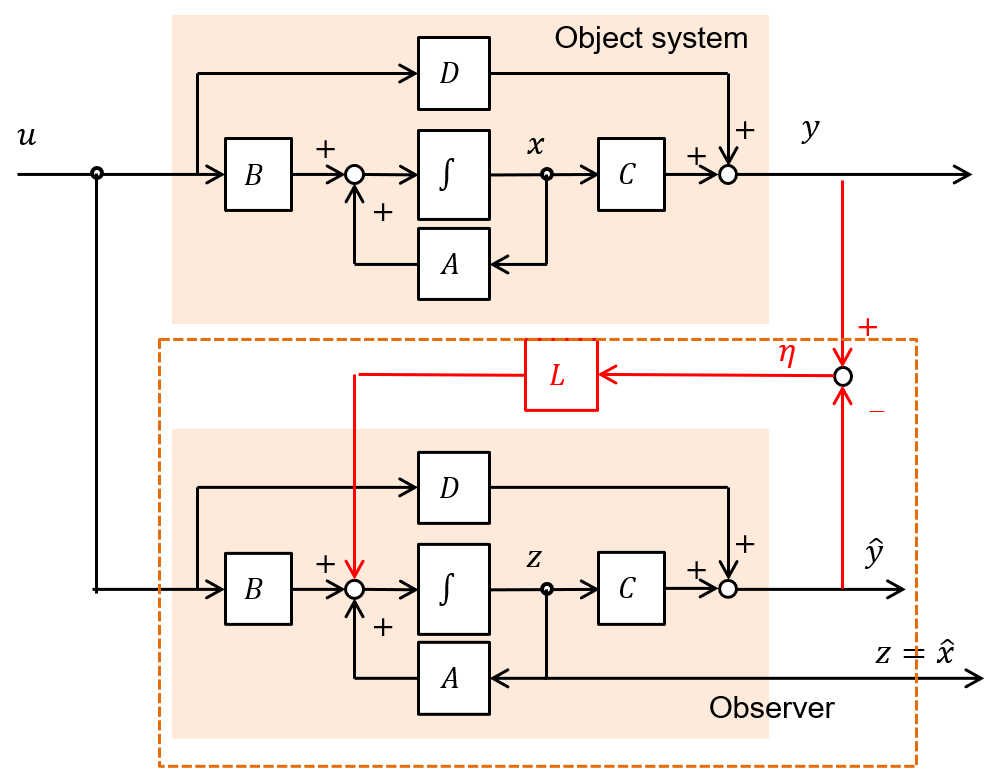

# 全状態オブザーバの構成

出力注入のゲイン$L$はオブザーバゲインやカルマンフィルタのゲインともよばれる。
これを用いて $y,u$を入力とし、状態推定値 $z(=\hat{x})$を出力とする全状態オブザーバは
\begin{equation}
   \dot{z}(t) = A z(t) + B u(t) + L(y(t)-Cz(t)-Du(t))  \nonumber
\end{equation}
で構成される。
これを変形すると
\begin{equation}
   \dot{z}(t) = (A-KC) z(t) + Ly(t) +(B-KD) u(t) \nonumber
\end{equation}



ここで $L$ はオブザーバゲイン（またはカルマンゲイン）と
呼ばれる。



この出力注入による推定誤差収束の可非を確認するにはシステムの可観測性に着目する。
すなわち以下の可観測行列のランク条件で確認する
\begin{equation}
  M_o = \left[ \begin{array}{c} C \\ CA \\ CA^2 \\ CA^3 \end{array} \right]
  \in {\mathrm R}^{8\times 4}
\end{equation}

# LQE問題設定によるオブザーバゲインの求め方

LQE問題の解として $L$ を得るには
リッカチ方程式
\begin{equation}
   A P + PA^\top + GQG^\top -PC^\top R^{-1}CP = 0
\end{equation}
の正定対称解 $P^*$を用いて
\begin{equation}
   L = P C^\top R^{-1}
\end{equation}
で得られる。

# モジュールのインストール
以下のライブラリを使用する。


*   numpy
*   matplotlib
*   control (制御工学ライブラリ)
*   cvxpy (LMIを求解するためのライブラリ)

### <参考>
<A href="https://python-control.readthedocs.io/en/0.10.0/">制御工学モジュール control のドキュメント</a><br>
<A href="https://numpy.org/doc">numpy のドキュメント</A><br>
<A href="https://matplotlib.org/stable/index.html">matplotlib のドキュメント</A><br>
<A href="https://www.cvxpy.org/">cvxpy のドキュメント</A>

In [ ]:
import numpy as np
# !pip install slycot
!pip install control         # vscode ではターミナルから手動でインストール
from control import matlab   # matlab 互換関数を使用する場合
import matplotlib.pyplot as plt

# プログラム

1.  制御対象のモデル
2.  可観測性の確認
3.  オブザーバゲインの計算
4.  オブザーバの構成
5.  シミュレーション１ 推定誤差の収束確認
6.  シミュレーション２ 観測と制御の分離定理の確認




# 制御対象のモデル
倒立振子のモデルを
$1$ 入力$4$出力$4$次の線形時不変システム(LTI)で与える。<br>
\begin{equation}
   \dot{x}(t) = A x(t) + B u(t) , \; x(0)=x_0  \\
    y(t) = C x(t),\;\; \nonumber
\end{equation}
ここで、$u(t)\in{\mathrm R}$はモータへの入力,
$y(t)\in{\mathrm R}^4$は出力,$x(t)\in{\mathrm R}^4$は状態の時刻$t\in [0,T_f]$での値を成分とする列ベクトルである。<br>
$\dot{x}$は状態$x$の導関数を表す。<br>
$A\in{\mathrm R}^{4\times 4}$,$B\in{\mathrm R}^{4\times 1}$,$C\in{\mathrm R}^{4\times 4}$,$D\in{\mathrm R}^{4\times 1}$は定数行列である.<br>
$x_0\in{\mathrm R}^4$は初期状態を表す。

制御対象に関わる物理量

In [ ]:
l = 0.15             # 振子の長さ
m = 0.0402           # 振子の質量
Jp = 0.00030142      # 振子の慣性モーメント
M = 0.6862           # 台車の質量
Jt = 1.34 * 10**(-4)
Jm = 1.30 * 10**(-7)
Jc = Jt + Jm
r = 0.02485
F = 0.36
c = 0.0015
g = 9.80665
a = 1.9

p = M + m + Jc/(r*r)
q = Jp + m*l*l
W = 1/(p * q - m * m * l * l)


係数行列の作成

In [ ]:
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, -m*m*g*l*l*W, -F*q*W, c*m*l*W],
    [0, m*g*l*p*W, F*m*l*W, -c*p*W]
    ])
B = np.array([[0, 0, a*q*W, -a*m*l*W]]).T
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
D = np.zeros((2, 1))

G = np.eye(4)
QN = np.diag([1,1,1,1])
RN = np.diag([1,1])

# 今回は使わないが、状態空間の生成は以下
sys = matlab.ss(A, B, C, D)


# 可観測性の確認
可観測性を以下の可観測行列$M_o$のランク条件で確認する


In [ ]:
Mo = C
Mo = np.append(C,Mo@A,axis=0)
Mo = np.append(C,Mo@A,axis=0)
Mo = np.append(C,Mo@A,axis=0)
print(Mo)
rank = np.linalg.matrix_rank(Mo)
print(rank)
if rank==4:
  print('Observable')
else:
  print('Not observable')


## オブザーバゲインを求める

In [ ]:
QN = np.diag([1,1,1,1])
RN = np.diag([1,1])
# L,P,E = matlab.lqe(sys,QN,RN)
L,P,E = matlab.lqe(A,G,C,QN,RN)


# オブザーバを構成する

In [ ]:
Ao = A - L @ C
Bo = np.append(L, B - L @ D, axis=1)
Co = np.eye(4)
Do = np.zeros((4,3))
sys_obs = matlab.ss(Ao, Bo, Co, Do)
matlab.pole(sys_obs)

# シミュレーション
## 閉ループ系の構成
LQR問題にもとづき状態フィードバックゲイン $K$ を求め、
に外生入力$v$を加えた
\begin{equation}
      u(t) = -K x(t) + r
\end{equation}
を施すと、閉ループ系を以下で構成する.
\begin{equation}
   \dot{x}(t) = (A-BK) x(t) + B r(t), \;\;x(0)=x_0  \\
    y(t) = (C-DK)x(t) + D r(t) ,\;\;  \nonumber
\end{equation}

In [ ]:
Q = np.diag(np.array([1,1,1,1]))*0.01
R = np.array([[1]])
K,P,E = matlab.lqr(sys,Q,R)      # matlab.lqr() を使用して状態フィードバックゲインを求める

A_ = A - B @ K
B_ = B
C_ = np.append( C - D @ K, -K, axis=0)
D_ = np.append( D, [[1]], axis=0)

sys_cl = matlab.ss(A_, B_, C_, D_)       # 閉ループ系の状態空間モデル
matlab.pole(sys_cl)


## 時間応答の観察
matlab.lsim で、システムの応答とオブザーバの応答を計算し描画する

初期値の推定誤差が収束して $0$となる様子が確認できる。

In [ ]:
# 初期値応答
Td = np.arange(0, 10, 0.01)    #シミュレーション時間
# rng = np.random.default_rng()
# print(rng)
# u = rng.random(len(Td))                    #入力
r = np.zeros(len(Td))
r[50:300] = np.ones(250)
r[500:750] = np.ones(250)

x0 = np.array([0.5, np.pi/5, 0,0])
yu, t, x = matlab.lsim(sys_cl, r, Td, x0)
u = (-K @ x.T).T + r

z0 = np.zeros((4,1))
z, t, xe = matlab.lsim(sys_obs, yu, Td)




応答波形を描画する

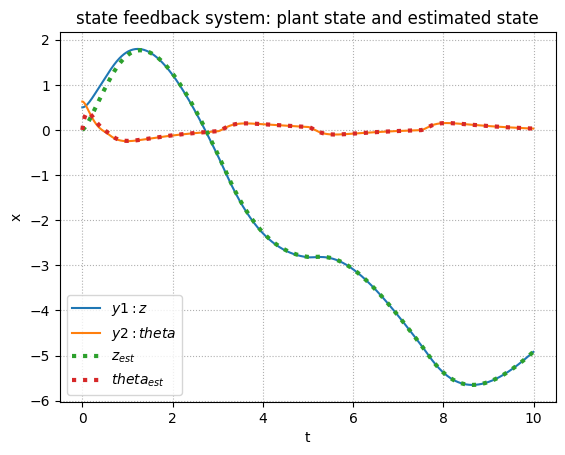

In [ ]:
# 初期値応答の描画
fig, ax = plt.subplots()
ax.plot(t, yu[:, 0], ls = '-', label = '$y1:z$')
ax.plot(t, yu[:, 1], ls = '-', label = '$y2:theta$')
# ax.plot(t, yu[:, 2], ls = ':', label = '$u$')
# ax.plot(t, u[:, 0], ls = ':', label = '$-Kx$')
ax.set_title('state feedback system: plant state and estimated state')

ax.plot(t, z[:, 0], ls = ':', lw = 3.0, label = '$z_{est}$')
ax.plot(t, z[:, 1], ls = ':', lw = 3.0, label = '$theta_{est}$')

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.grid(ls=':')
ax.legend(loc='best')
plt.show()

## 状態フィードバック＋オブザーバによる出力フィードバック
閉ループ系の構成
状態フィードバックの代わりに推定値$z$をフィードバックする。
すなわち、制御入力は
$u(t)=−Kz(t)+r$
となる。
このとき、$y,r$と$z$の間には以下の関係が成り立つ
\begin{equation}
   \dot{z}(t) = (A-LC+(B-LD)K) z(t) + Ly(t) + (B-LD) r(t) \\
    u(t) = -K z(t) + r(t) ,\;\;  \nonumber
\end{equation}


In [ ]:
A_ = A - L@C - (B-L@D)@K
B_ = L
C_ = -K
D_ = [[0,0]]

sys_fbc = matlab.ss(A_, B_, C_, D_)       # 動的出力フィードバック制御器


sys_total = matlab.feedback(sys, sys_fbc, sign=1)

print('pole of state feedback system')
print(matlab.pole(sys_cl))
print('pole of obsereber')
print(matlab.pole(sys_obs))
print('pole of feedback controller')
print(matlab.pole(sys_fbc))
print('pole of total closed system')
print(matlab.pole(sys_total))


pole of state feedback system
[-7.99523477+0.j        -6.33752342+0.j        -0.38360674+0.2326842j
 -0.38360674-0.2326842j]
pole of obsereber
[-0.90677883+0.49870679j -0.90677883-0.49870679j -6.3542075 +0.j
 -7.97658764+0.j        ]
pole of feedback controller
[-14.13266877+12.12944935j -14.13266877-12.12944935j
  -0.97516529 +0.j          -0.32479144 +0.j        ]
pole of total closed system
[-0.38360674+0.2326842j  -0.38360674-0.2326842j  -0.90677883+0.49870679j
 -0.90677883-0.49870679j -6.33752342+0.j         -6.3542075 +0.j
 -7.99523477+0.j         -7.97658764+0.j        ]


状態フィードバック則を変更すると閉ループ系の極は変化するが、オブザーバの極は不変であることがわかる。

pole of state feedback syste<br>
[-14.15381853+0.j &nbsp;
 -3.23728188+0.j  &nbsp;
 -1.83597794+0.j  &nbsp;
 -1.21245184+0.j]<br>
pole of obsereber<br>
[-0.90677883+0.49870679j  &nbsp; -0.90677883-0.49870679j<br>
 -6.3542075 +0.j &nbsp; -7.97658764+0.j        ]<br>
pole of feedback controller<br>
[-16.95597518+13.39397273j &nbsp; -16.95597518-13.39397273j<br>
  -1.1839547  +0.j     &nbsp;       0.19105229 +0.j        ]<br>
pole of total closed system<br>
[-14.15381853+0.j   &nbsp;  -1.21245184+0.j<br>
  -1.83597794+0.j    &nbsp; -3.23728188+0.j<br>
  -0.90677883+0.49870679j  &nbsp; -0.90677883-0.49870679j<br>
  -6.3542075 +0.j           &nbsp; -7.97658764+0.j        ]<br>
  